# Lab 4: Selection

### Required packages

In [10]:
library(TSA)
library(astsa)
library(fUnitRoots)
library(forecast)

#### Lag plots of the speech data

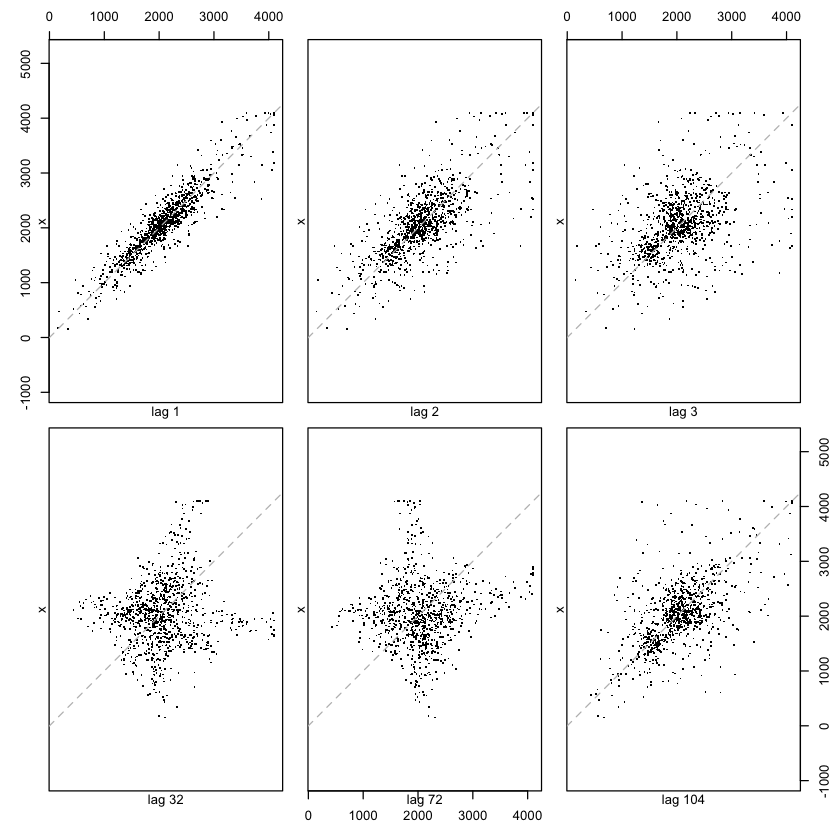

In [4]:
x = speech
lag.plot(x, layout=c(2,3), set.lags=c(1:3, 32, 72, 104), pch=".")

#### Comparison of ACF with standard and MA confidence bounds.

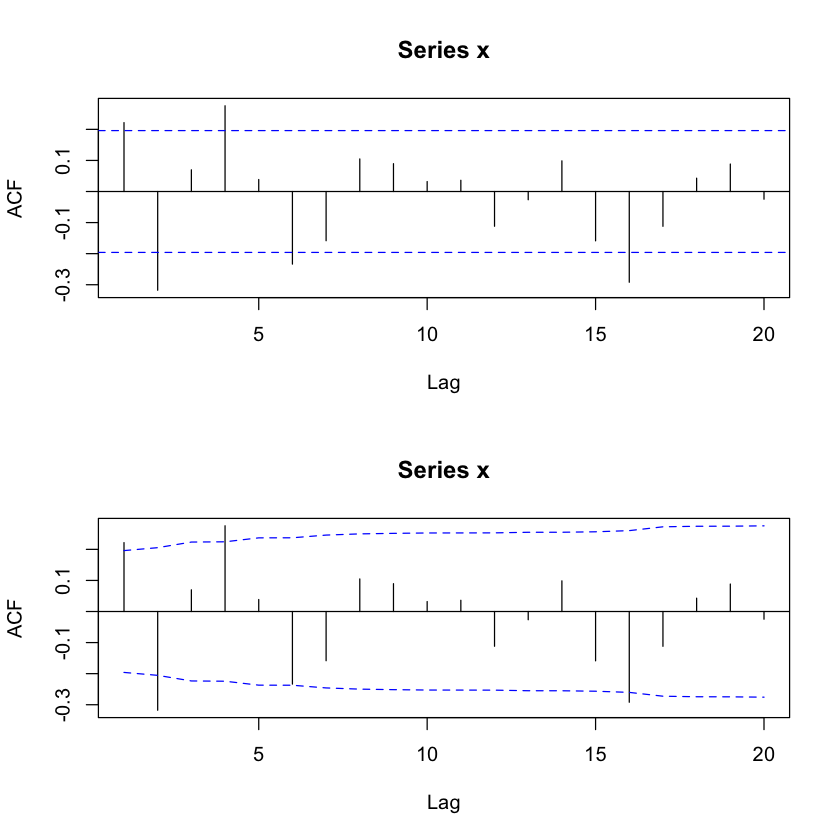

In [5]:
x = arima.sim(model=list(ma=c(3/4, -1/5, -1/5)), 100)
par(mfrow=c(2, 1))
acf(x); acf(x, ci.type="ma")

#### ACF and PACF of simulated AR(1) with $\phi_1$ = 3/4, MA(1) with $\theta_1$ = 3/4 and random walk.

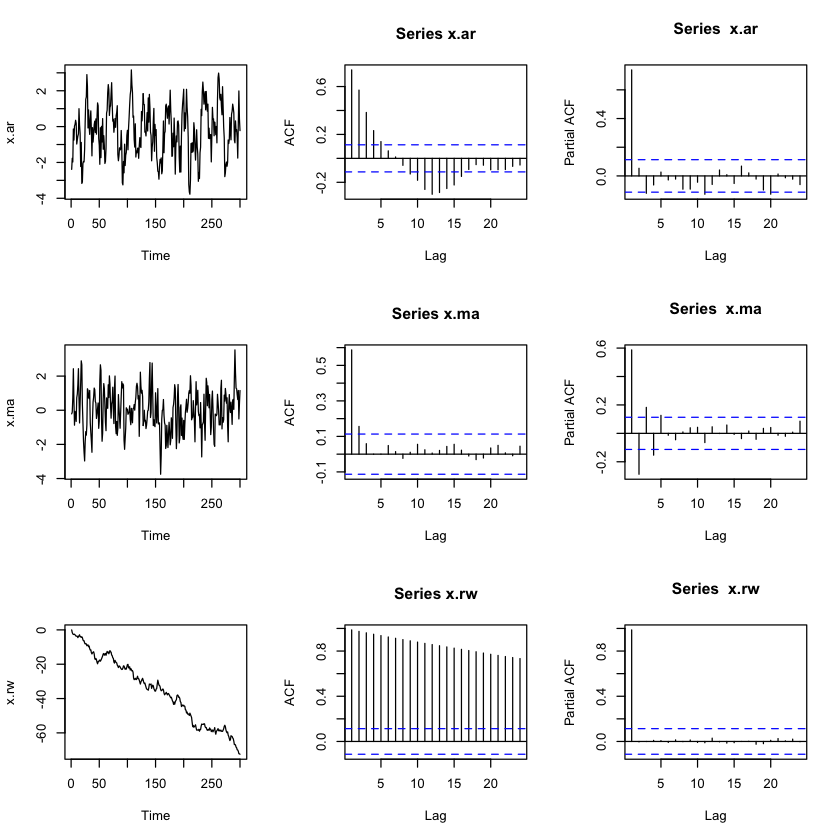

In [6]:
n = 300
x.ar <- arima.sim(model=list(ar=c(3/4)), n)
x.ma <- arima.sim(model=list(ma=c(3/4)), n)
x.rw <- cumsum(rnorm(n))
par(mfrow=c(3,3))
ts.plot(x.ar); acf(x.ar); pacf(x.ar)
ts.plot(x.ma); acf(x.ma); pacf(x.ma)
ts.plot(x.rw); acf(x.rw); pacf(x.rw)

Note that AICc converges to AIC as n tends to infinity, but the penalty of BIC will be higher, leading to favour models with less parameters.


In [31]:
p=10
q=10
x=speech
fit <- arima(x, order=c(p,0,q))
n <- length(x); 
k <- q+p+2
fit.aic  <- AIC(fit)
fit.aicc <- AIC(fit, k=2*n/(n-k-1))
fit.bic  <- AIC(fit, k=log(n))

Warning message in stats::arima(x = x, order = order, seasonal = seasonal, xreg = xreg, :
“possible convergence problem: optim gave code = 1”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  12139   12139   12139   12139   12139   12139 

In [14]:
log_AP <- log(AirPassengers)
fit <- auto.arima(log_AP, ic="aicc")
summary(fit)

Series: log_AP 
ARIMA(0,1,1)(0,1,1)[12] 

Coefficients:
          ma1     sma1
      -0.4018  -0.5569
s.e.   0.0896   0.0731

sigma^2 = 0.001371:  log likelihood = 244.7
AIC=-483.4   AICc=-483.21   BIC=-474.77

Training set error measures:
                       ME       RMSE        MAE        MPE      MAPE      MASE
Training set 0.0005730622 0.03504883 0.02626034 0.01098898 0.4752815 0.2169522
                   ACF1
Training set 0.01443892

#### MA

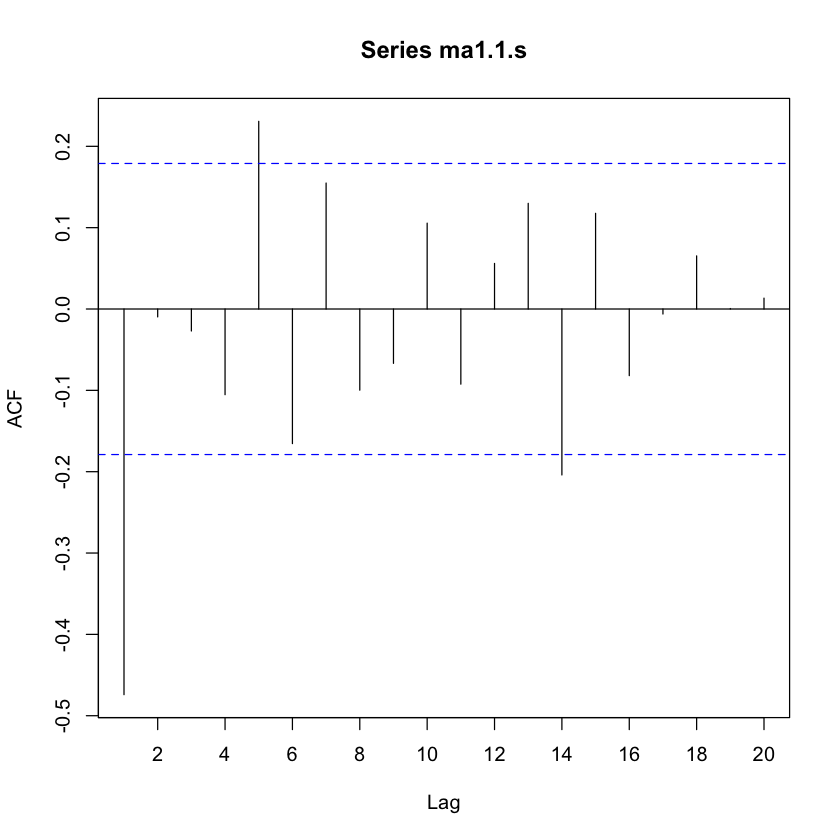

In [13]:
data(ma1.1.s)
acf(ma1.1.s,xaxp=c(0,20,10))   

if the argument xaxp is omitted, the tick marks will be generated according to the default convention. Run the command ?par to learn more the xaxp argment.

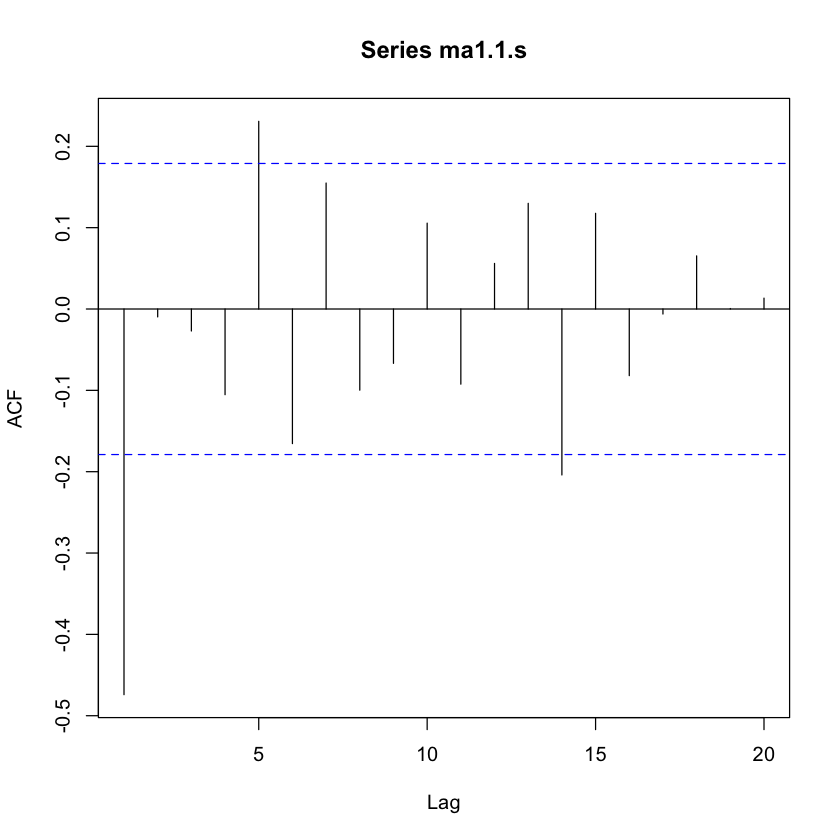

In [15]:
acf(ma1.1.s) # see the new tickmarks

Note the acf values (mostly) cut off after lag 1 (do you see the exceptions to this?). So how was `xaxp` determined? First run the command without xaxp to find out how many lags are on the x-axis. Suppose there are 20 lags. Then we specify `xaxp=c(0,20,10)`, i.e. the two extreme tickmarks are 0 and 20, and we want 10 tickmarks in between. How to set the xaxp argument if we want 1 tickmark for each lag?

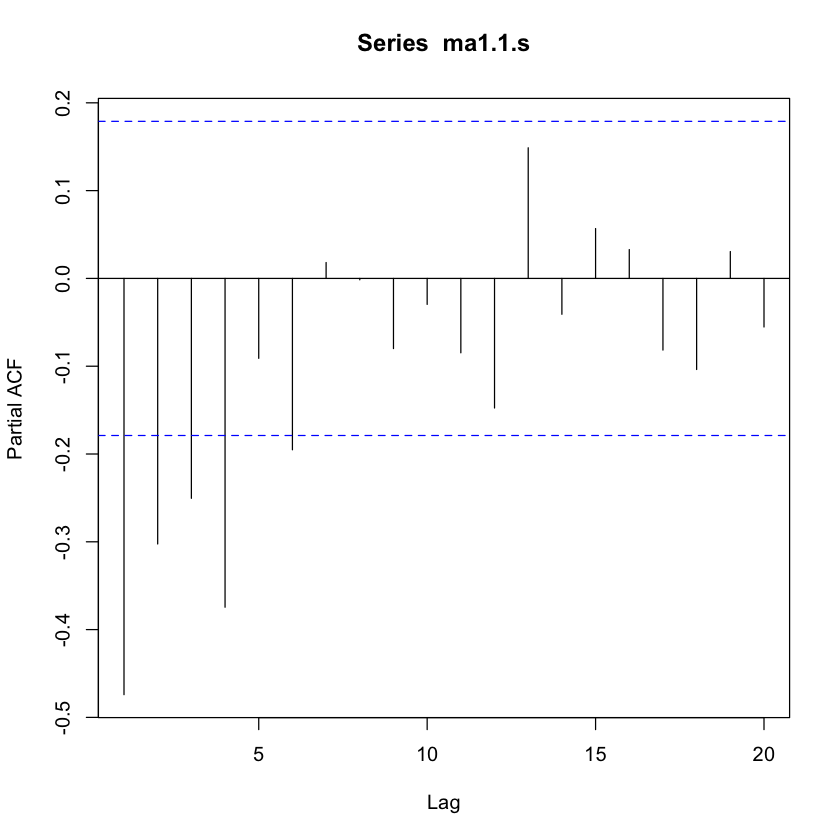

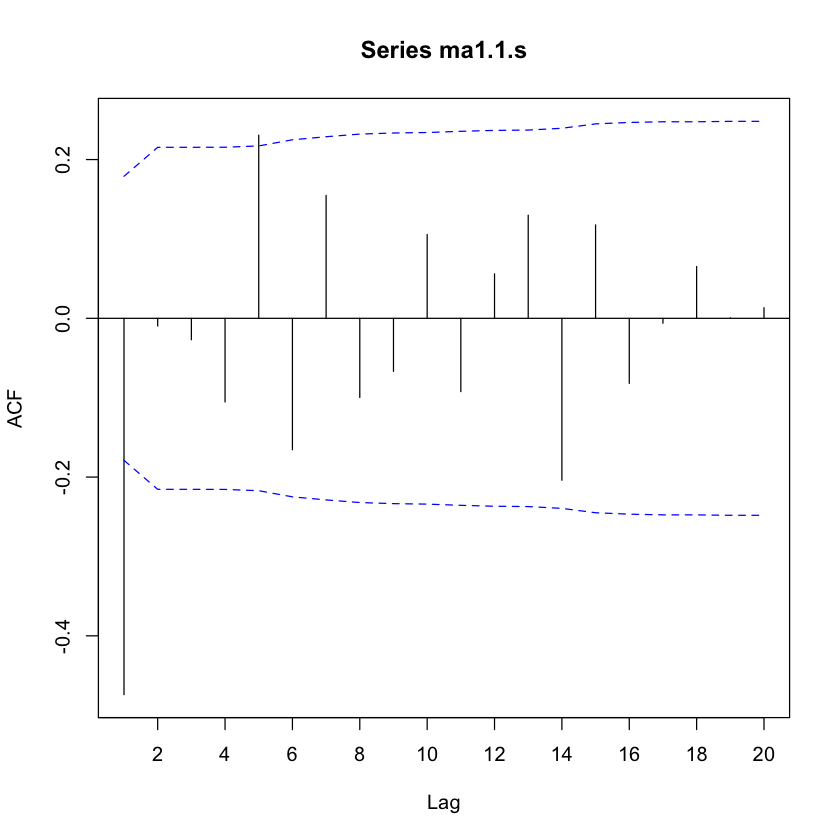

In [16]:
pacf(ma1.1.s) # Note the PACF values decay toward zero (roughly) rather than cut off.
acf(ma1.1.s,ci.type='ma',xaxp=c(0,20,10))

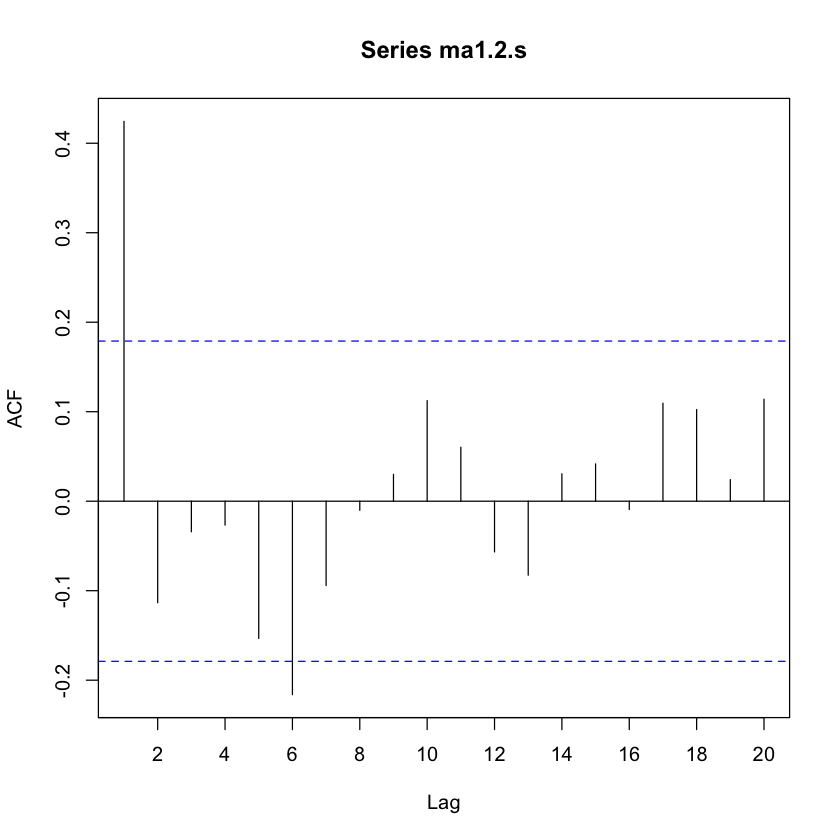

In [17]:
data(ma1.2.s)
acf(ma1.2.s,xaxp=c(0,20,10))

#### AR

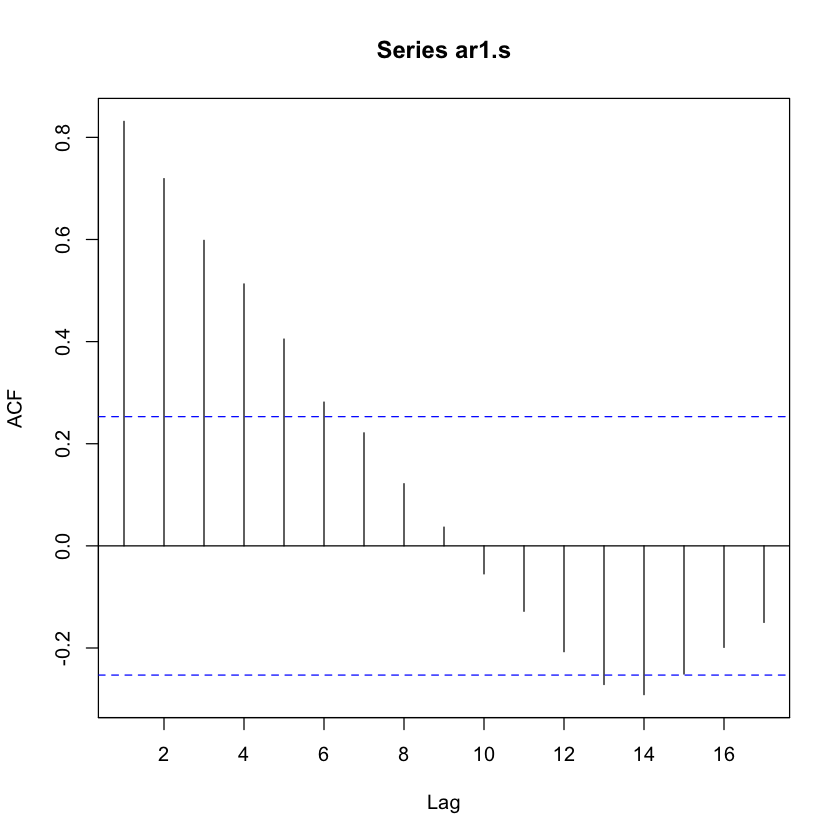

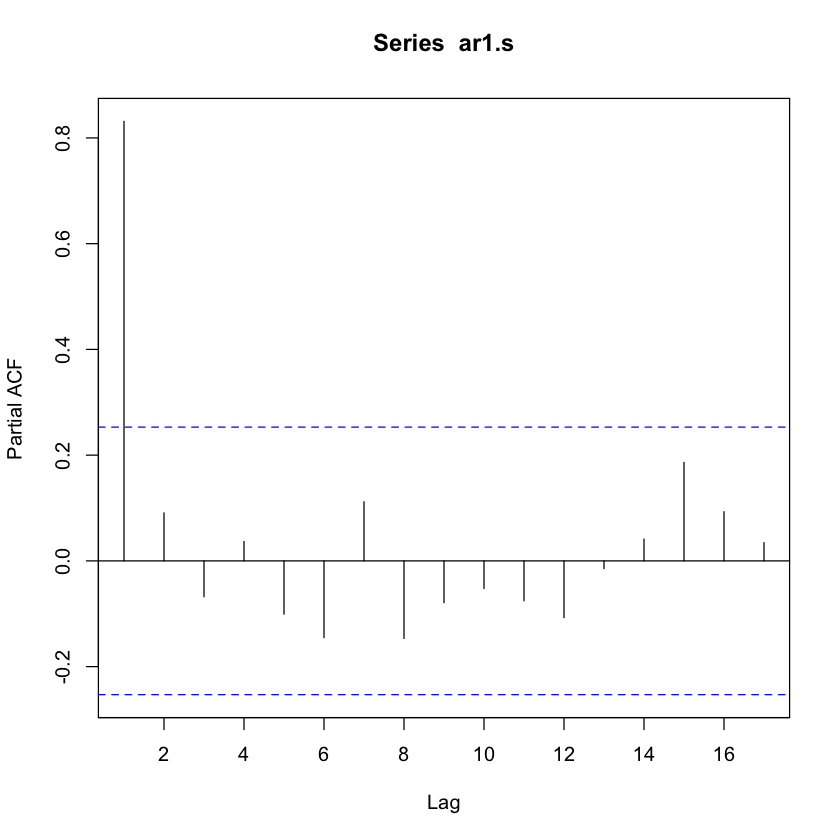

In [18]:
data(ar1.s)
acf(ar1.s,xaxp=c(0,20,10))
pacf(ar1.s,xaxp=c(0,20,10))

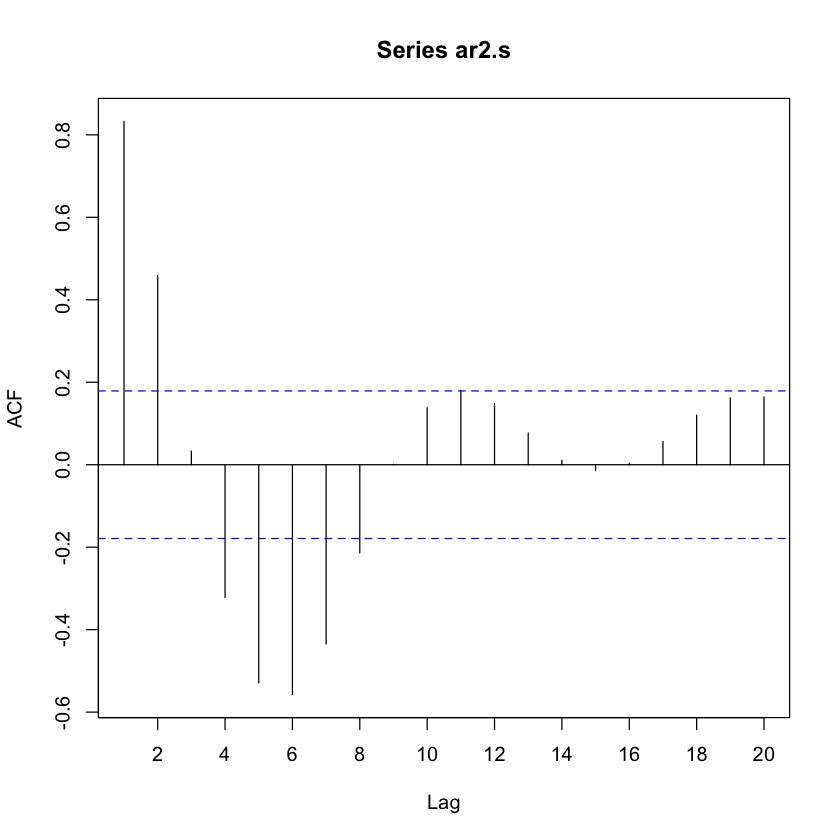

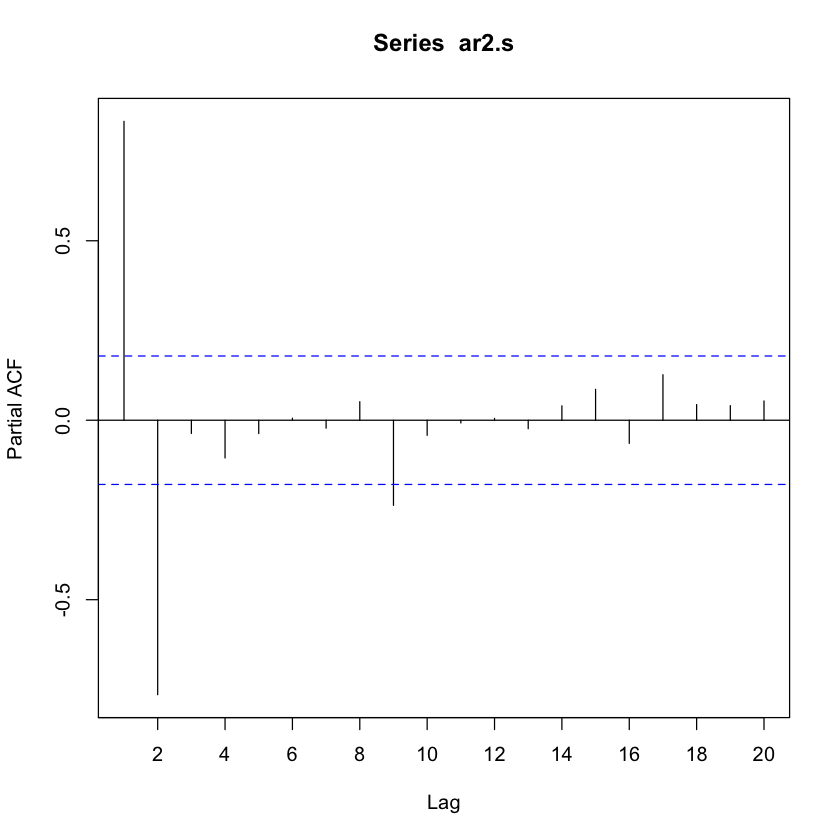

In [19]:
data(ar2.s)
acf(ar2.s,xaxp=c(0,20,10))
pacf(ar2.s,xaxp=c(0,20,10))

#### ARMA

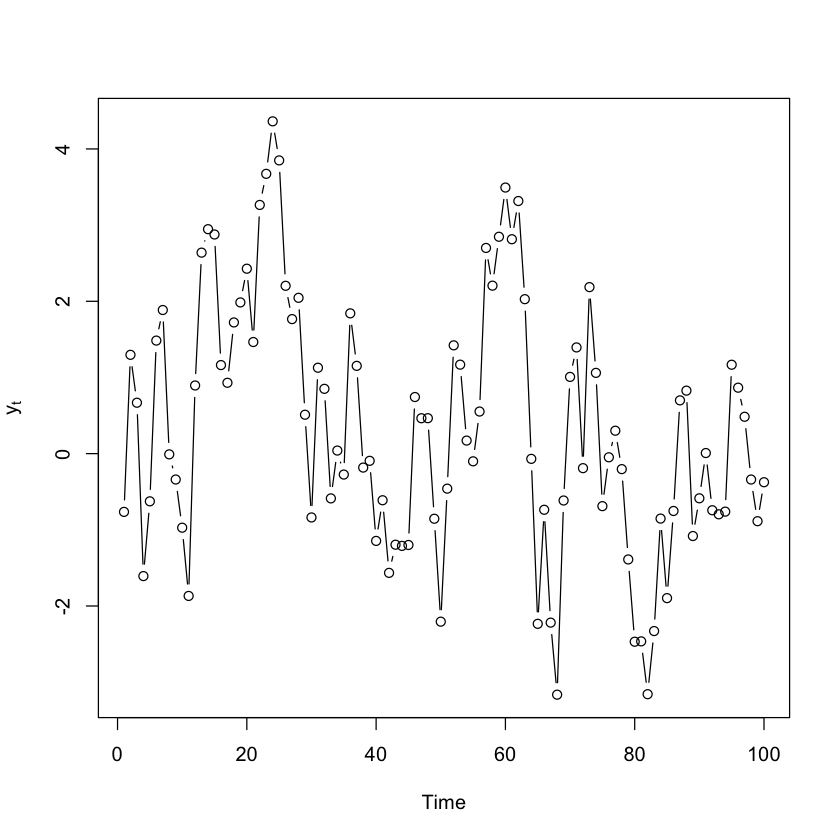

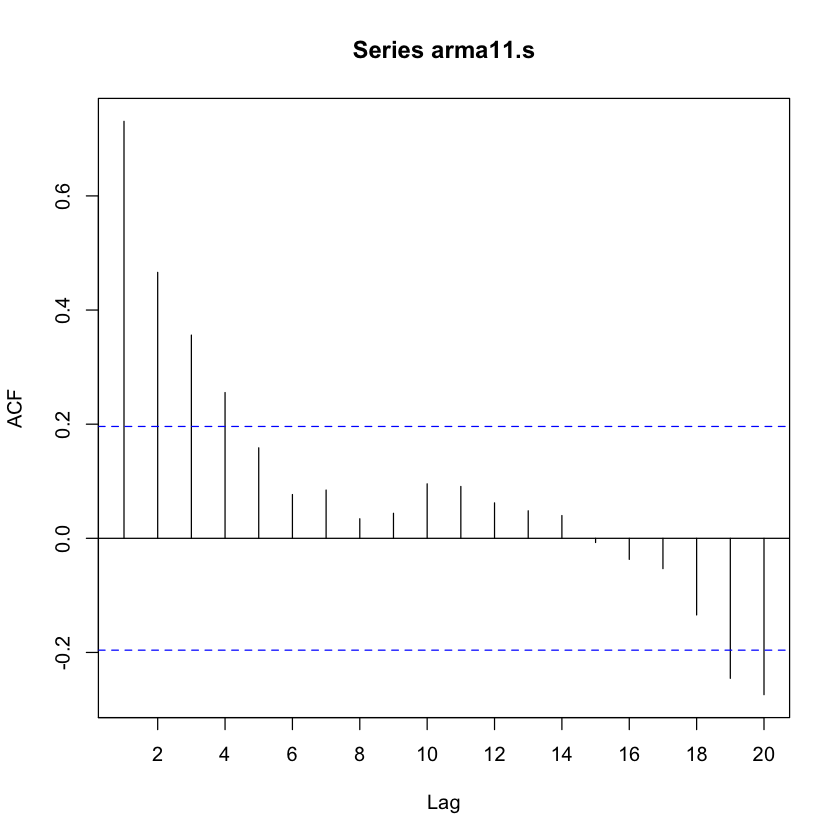

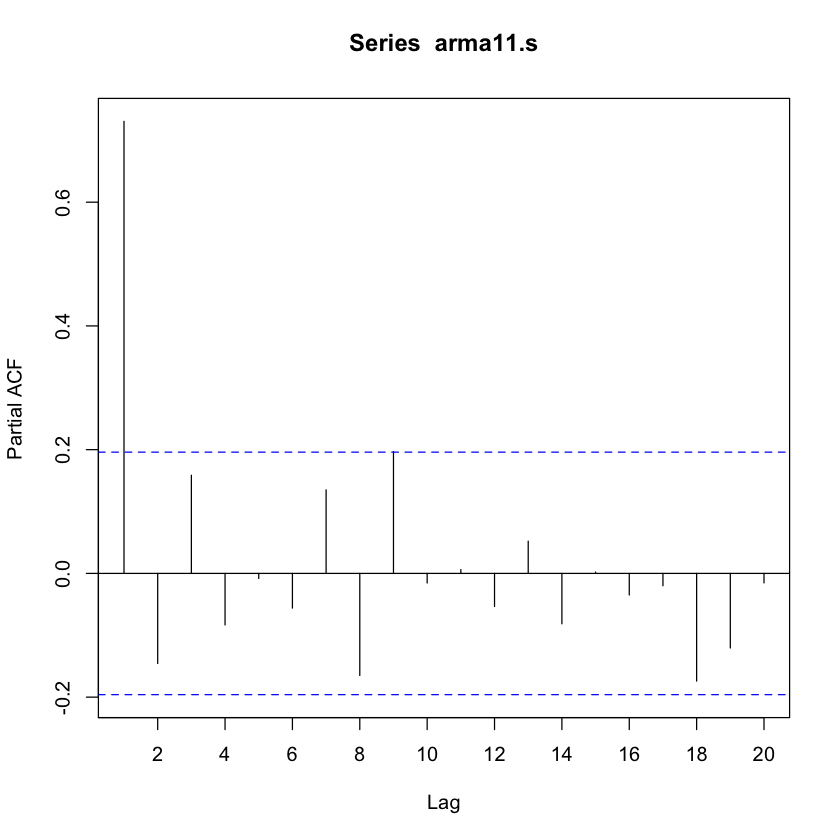

In [20]:
data(arma11.s)
plot(arma11.s, type='b',ylab=expression(y[t]))

acf(arma11.s,xaxp=c(0,20,10))
pacf(arma11.s,xaxp=c(0,20,10))

#### Sample ACF and PACF of a simulated AR(2) Model (from Shumway/Stoffer book)

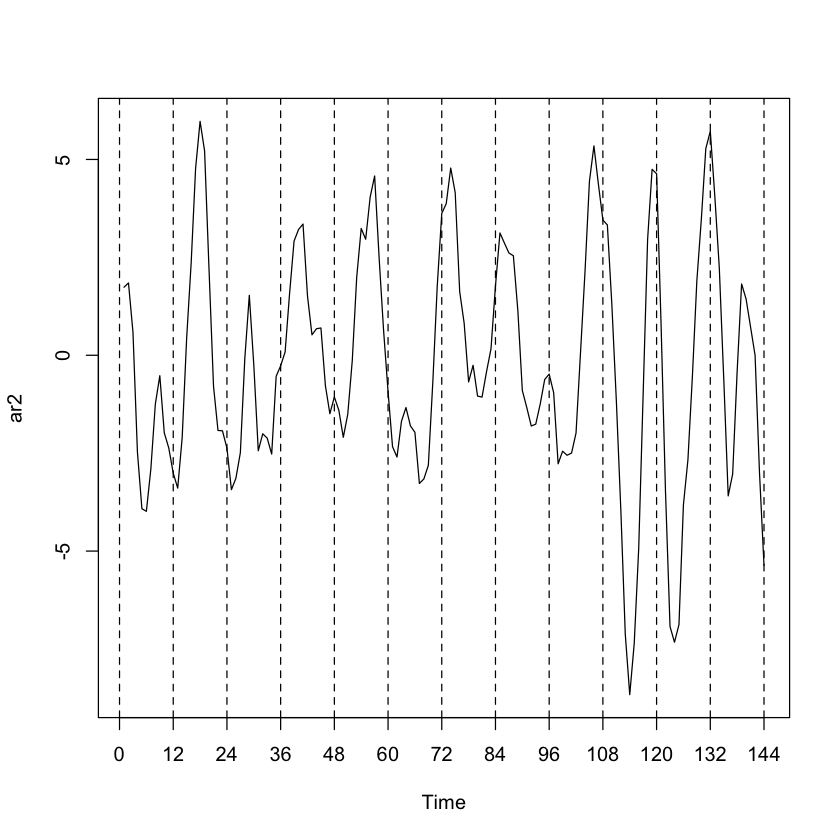

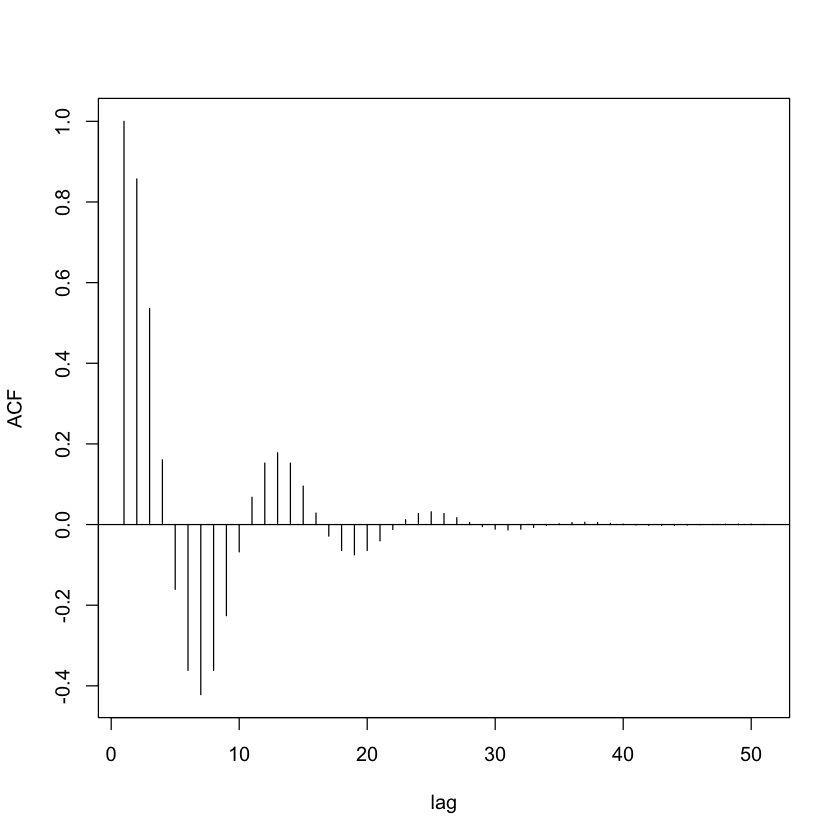

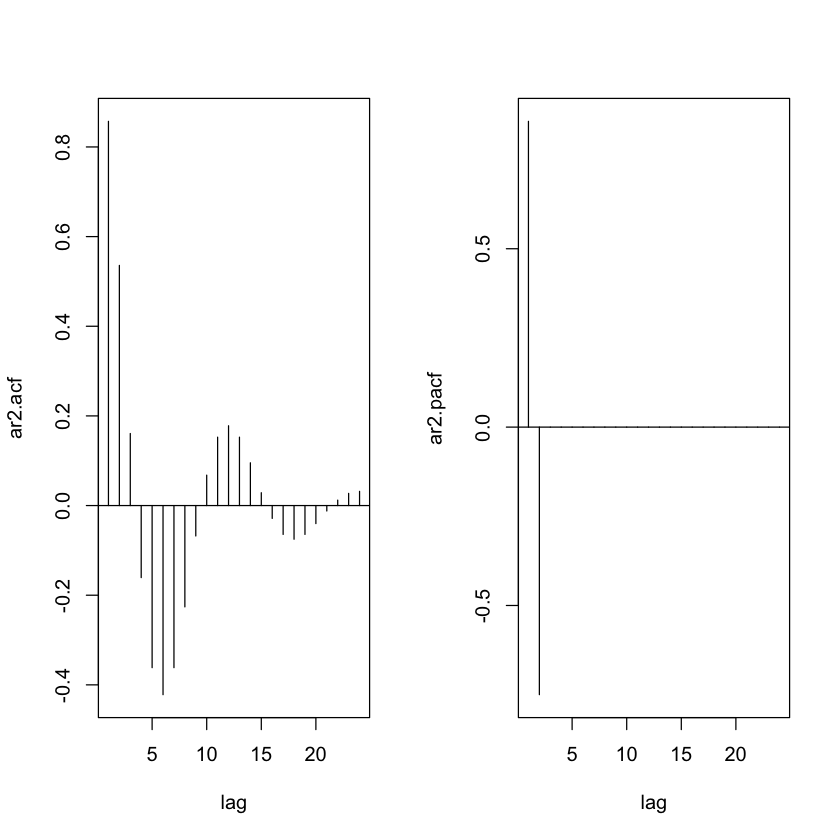

In [21]:
set.seed(8675309)   
ar2 = arima.sim(list(order=c(2,0,0), ar=c(1.5,-.75)), n = 144)
plot(ar2, axes=FALSE, xlab="Time")
axis(2); axis(1, at=seq(0,144,by=12)); box()  # work the plot machine
abline(v=seq(0,144,by=12), lty=2)

ACF = ARMAacf(ar=c(1.5,-.75), ma=0, 50)
plot(ACF, type="h", xlab="lag")
abline(h=0)

ar2.acf = ARMAacf(ar=c(1.5,-.75), ma=0, 24)[-1]
ar2.pacf = ARMAacf(ar=c(1.5,-.75), ma=0, 24, pacf=TRUE)
par(mfrow=c(1,2))
plot(ar2.acf, type="h", xlab="lag")
abline(h=0)
plot(ar2.pacf, type="h", xlab="lag")
abline(h=0)
par(mfrow=c(1,1))

#### Random Walk

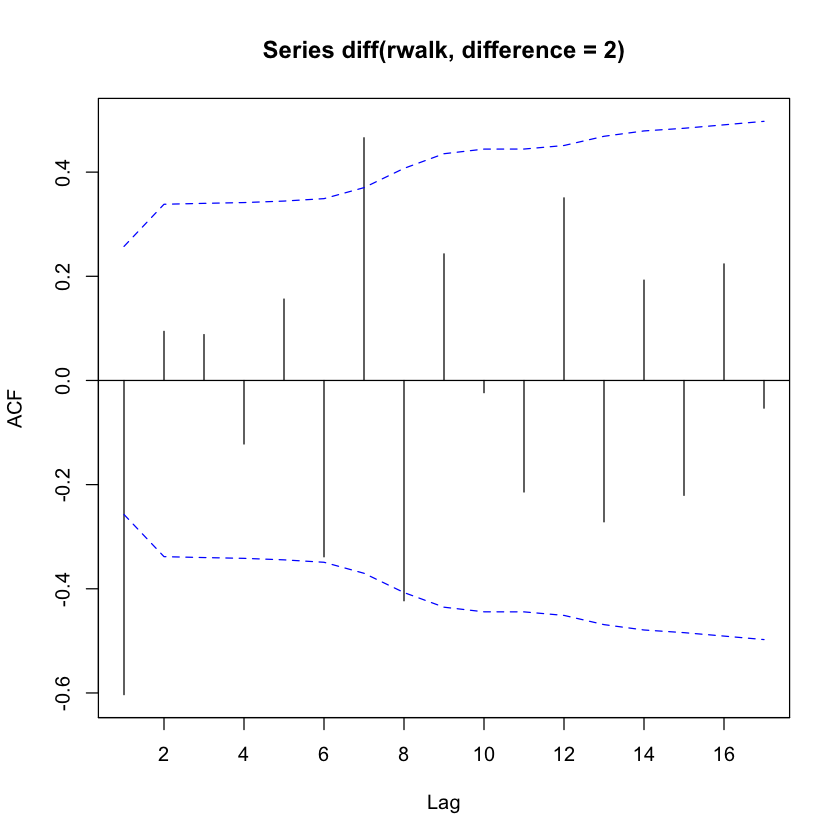


Call:
ar(x = diff(rwalk))

Coefficients:
      1        2        3        4        5        6        7        8  
-0.1622  -0.1234   0.0036  -0.1961  -0.1597  -0.3418   0.0652  -0.3228  

Order selected 8  sigma^2 estimated as  0.8394

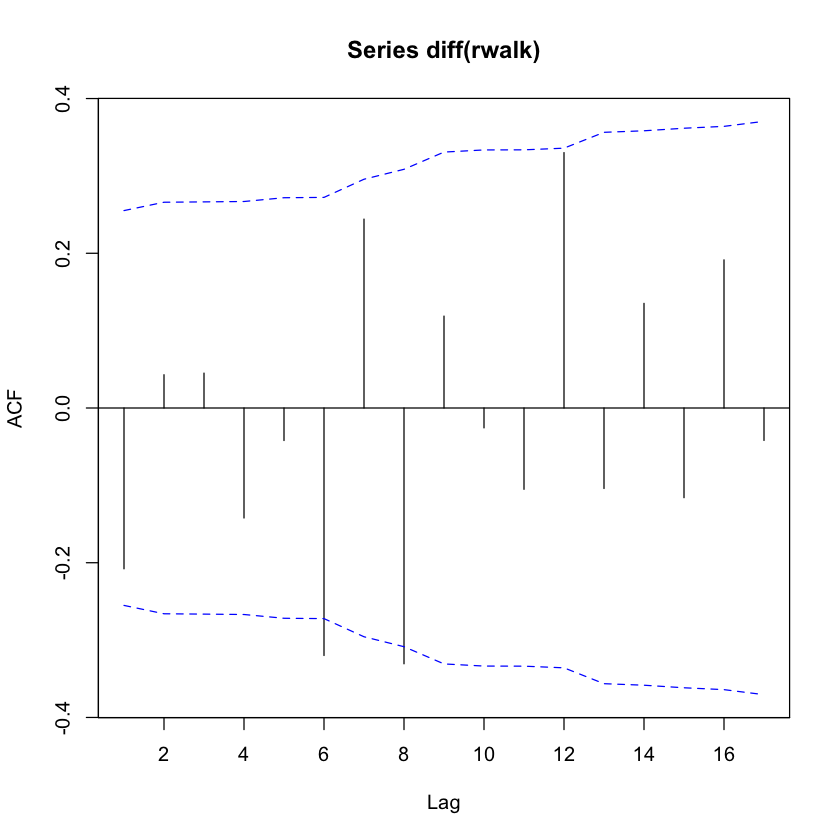

In [24]:
data(rwalk)
acf(diff(rwalk,difference=2),ci.type='ma',xaxp=c(0,18,9))
acf(diff(rwalk),ci.type='ma',xaxp=c(0,18,9))
ar(diff(rwalk)) # order 8 is indicated by AIC

#### Augmented Dickey-Fuller Testing
- Carry out the Dickey-Fuller unit root tests
- Find out the AR order for the differenced series:

Testing for difference nonstationarity:

- The type='c' assumes just a constant (intercept), not a linear trend:

In [25]:
adfTest(rwalk,lags=8,type='c')  # The AIC indicates the correct order is k=8


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 8
  STATISTIC:
    Dickey-Fuller: -0.6006
  P VALUE:
    0.8281 

Description:
 Mon Oct  2 20:28:57 2023 by user: 

In comparison, setting the true order k to be 0:

In [26]:
adfTest(rwalk,lags=0,type='c')


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -1.7382
  P VALUE:
    0.4131 

Description:
 Mon Oct  2 20:28:59 2023 by user: 

- The truth for this example is that k=0: Since Y_t is a random walk, the first differences are white noise, i.e., AR(0).
- Testing for trend nonstationarity: Repeat the test with the alternative have an intercept term and a linear trend

In [27]:
adfTest(rwalk,lags=8,type='ct')  # Based on the order 8 that the AIC indicates
adfTest(rwalk,lags=0,type='ct')  # Based on the order 0 that is the truth, but in reality would be unknown


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 8
  STATISTIC:
    Dickey-Fuller: -2.2892
  P VALUE:
    0.4579 

Description:
 Mon Oct  2 20:29:02 2023 by user: 


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 0
  STATISTIC:
    Dickey-Fuller: -3.4904
  P VALUE:
    0.0501 

Description:
 Mon Oct  2 20:29:02 2023 by user: 


Call:
ar(x = diff(log(jj)))

Coefficients:
      1        2        3        4        5  
-0.6722  -0.4383  -0.4048   0.3668   0.1615  

Order selected 5  sigma^2 estimated as  0.0149


Title:
 Augmented Dickey-Fuller Test

Test Results:
  PARAMETER:
    Lag Order: 5
  STATISTIC:
    Dickey-Fuller: -1.4369
  P VALUE:
    0.8069 

Description:
 Mon Oct  2 20:29:04 2023 by user: 

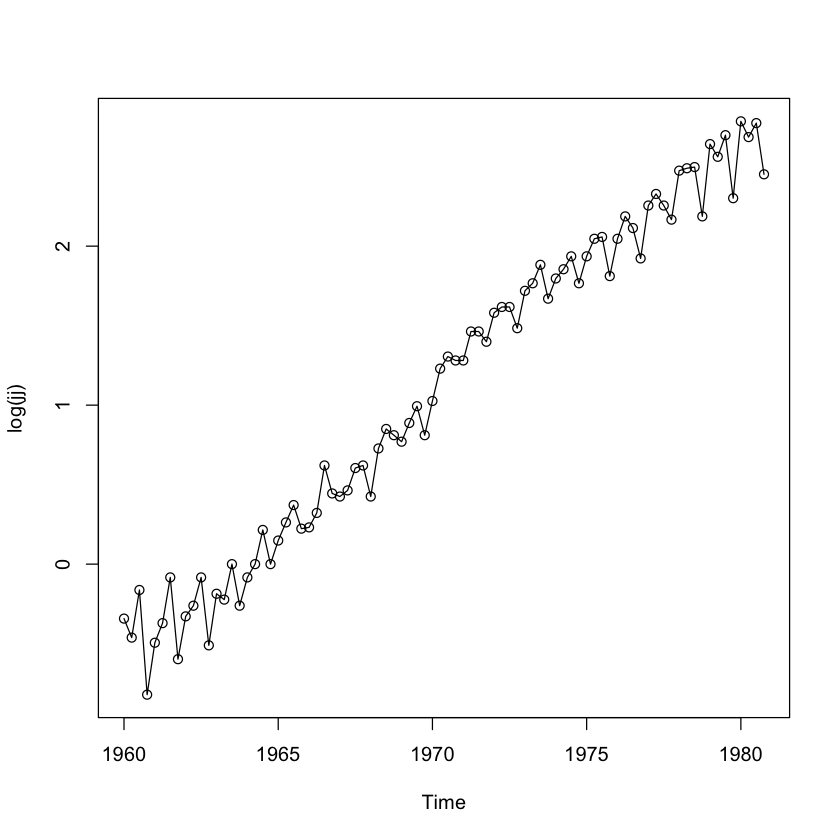

In [28]:
data(jj); 
plot(log(jj), type='o')
ar(diff(log(jj)))
adfTest(log(jj),lags=5,type='ct')
# Fail to reject H0:  Conclude the logged Johnson & Johnson data is trend nonstationary.